In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('../Outputs/Lump0816_365_515.xlsx')

In [3]:
df.head()

,OBJECTID_12,FID_Lump_Albers_08_365_515,OBJECTID,LAISKEY,LU_CODE,LU_DESC,SRC_SCALE,SRC_DATE,RELIABLE,LUC_DATE,...,PRIM_NO,PRIM_DESC,SEC_NO,SEC_DESC,AREA_HA,SHAPE_Leng_1,AREA_M2_1,AREA_16_M2,Shape_Length,Shape_Area
0,1,0,3394,685 06973,5.1.1,Shadehouses,"1:20,000",2008-02-01 00:00:00,2,2008-08-07 00:00:00,...,0,NaN,0,NaN,0.0,0.0,0.0,0.0,170.072448,360.466350
1,2,1,3520,685 04743,5.1.1,Shadehouses,"1:20,000",2008-02-01 00:00:00,2,2008-08-07 00:00:00,...,0,NaN,0,NaN,0.0,0.0,0.0,0.0,937.640122,31019.565942
2,3,2,15772,055 04303,4.5.0,Irrigated seasonal horticulture,"1:20,000",2008-02-01 00:00:00,3,2008-08-07 00:00:00,...,0,NaN,0,NaN,0.0,0.0,0.0,0.0,660.397629,7227.306870
3,4,3,16449,055 02853,4.4.0,Irrigated perennial horticulture,"1:10,000",2008-05-15 00:00:00,1,2008-05-17 00:00:00,...,0,NaN,0,NaN,0.0,0.0,0.0,0.0,1020.910522,20604.525862
4,5,4,16483,055 03938,5.1.0,Intensive horticulture,"1:20,000",2008-02-01 00:00:00,2,2008-08-07 00:00:00,...,0,NaN,0,NaN,0.0,0.0,0.0,0.0,1112.959190,74765.810022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 39 columns):
OBJECTID_12                   6166 non-null int64
FID_Lump_Albers_08_365_515    6166 non-null int64
OBJECTID                      6166 non-null int64
LAISKEY                       4069 non-null object
LU_CODE                       4069 non-null object
LU_DESC                       4069 non-null object
SRC_SCALE                     4069 non-null object
SRC_DATE                      6166 non-null object
RELIABLE                      6166 non-null int64
LUC_DATE                      6166 non-null object
LU_NO                         6166 non-null int64
CLASS_NO                      6166 non-null int64
CLASS_DESC                    4069 non-null object
SUB_CLASS                     4069 non-null object
Shape_Leng                    6166 non-null float64
AREA_M2                       6166 non-null float64
AREA_08_M2                    6166 non-null float64
FID_Lump_Albers_16_365_515   

###### Convert LU units into strings splice them and then convert them to integers for later extraction.

In [5]:
#change 08 and 16 to strings
df['CODE_08'] = df['LU_NO'].astype(str)
df['CODE_16'] = df['LU_CODEN'].astype(str)

In [6]:
# make the new columns for LU08 using string indexing
df['prim_08'] = df['CODE_08'].str[0:1]
df['secon_08'] = df['CODE_08'].str[:2]
df['third_08'] = df['CODE_08'].str[0:3]
# make the new columns for LU16 using string indexing
df['prim_16'] = df['CODE_16'].str[0:1]
df['secon_16'] = df['CODE_16'].str[:2]
df['third_16'] = df['CODE_16'].str[0:3]

In [7]:
#change 08 and 16 to intigers
df['seconint_16'] = df['secon_16'].astype(int)
df['seconint_08'] = df['secon_08'].astype(int)

In [8]:
df1 = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 49 columns):
OBJECTID_12                   6166 non-null int64
FID_Lump_Albers_08_365_515    6166 non-null int64
OBJECTID                      6166 non-null int64
LAISKEY                       4069 non-null object
LU_CODE                       4069 non-null object
LU_DESC                       4069 non-null object
SRC_SCALE                     4069 non-null object
SRC_DATE                      6166 non-null object
RELIABLE                      6166 non-null int64
LUC_DATE                      6166 non-null object
LU_NO                         6166 non-null int64
CLASS_NO                      6166 non-null int64
CLASS_DESC                    4069 non-null object
SUB_CLASS                     4069 non-null object
Shape_Leng                    6166 non-null float64
AREA_M2                       6166 non-null float64
AREA_08_M2                    6166 non-null float64
FID_Lump_Albers_16_365_515   

In [9]:
df1 = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Data columns (total 49 columns):
OBJECTID_12                   6166 non-null int64
FID_Lump_Albers_08_365_515    6166 non-null int64
OBJECTID                      6166 non-null int64
LAISKEY                       4069 non-null object
LU_CODE                       4069 non-null object
LU_DESC                       4069 non-null object
SRC_SCALE                     4069 non-null object
SRC_DATE                      6166 non-null object
RELIABLE                      6166 non-null int64
LUC_DATE                      6166 non-null object
LU_NO                         6166 non-null int64
CLASS_NO                      6166 non-null int64
CLASS_DESC                    4069 non-null object
SUB_CLASS                     4069 non-null object
Shape_Leng                    6166 non-null float64
AREA_M2                       6166 non-null float64
AREA_08_M2                    6166 non-null float64
FID_Lump_Albers_16_365_515   

In [10]:
df.head()

,OBJECTID_12,FID_Lump_Albers_08_365_515,OBJECTID,LAISKEY,LU_CODE,LU_DESC,SRC_SCALE,SRC_DATE,RELIABLE,LUC_DATE,...,CODE_08,CODE_16,prim_08,secon_08,third_08,prim_16,secon_16,third_16,seconint_16,seconint_08
0,1,0,3394,685 06973,5.1.1,Shadehouses,"1:20,000",2008-02-01 00:00:00,2,2008-08-07 00:00:00,...,511,0,5,51,511,0,0,0,0,51
1,2,1,3520,685 04743,5.1.1,Shadehouses,"1:20,000",2008-02-01 00:00:00,2,2008-08-07 00:00:00,...,511,0,5,51,511,0,0,0,0,51
2,3,2,15772,055 04303,4.5.0,Irrigated seasonal horticulture,"1:20,000",2008-02-01 00:00:00,3,2008-08-07 00:00:00,...,450,0,4,45,450,0,0,0,0,45
3,4,3,16449,055 02853,4.4.0,Irrigated perennial horticulture,"1:10,000",2008-05-15 00:00:00,1,2008-05-17 00:00:00,...,440,0,4,44,440,0,0,0,0,44
4,5,4,16483,055 03938,5.1.0,Intensive horticulture,"1:20,000",2008-02-01 00:00:00,2,2008-08-07 00:00:00,...,510,0,5,51,510,0,0,0,0,51


###### Select the columns of interest as df1 and df20

In [11]:
df20 = df[['secon_08', 'AREA_08_M2']]
df20.head()

,secon_08,AREA_08_M2
0,51,360.466350
1,51,31019.565942
2,45,79145.763725
3,44,132832.131521
4,51,74765.810022


In [12]:
df1 = df[['secon_16', 'AREA_16_M2']]
df1.head()

,secon_16,AREA_16_M2
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [13]:
# multiple functions
df_16 = df.groupby('secon_16')['AREA_16_M2'].agg([
    np.sum,
    np.mean,
    np.count_nonzero,
])#.unstack()
# multiple functions
df_08 = df.groupby('secon_08')['AREA_08_M2'].agg([
    np.sum,
    np.mean,
    np.count_nonzero,
])#.unstack()

In [14]:
df_16


,sum,mean,count_nonzero
secon_16,,,
0,0.000000e+00,0.000000,0.0
36,5.245401e+05,65567.515551,8.0
41,6.339301e+07,551243.539883,115.0
42,8.703489e+06,543968.049411,16.0
43,1.871820e+07,415960.063409,45.0
44,1.569975e+08,50062.964554,3136.0
45,8.050303e+07,90048.128172,894.0
46,4.441280e+07,173487.517074,256.0
51,1.573265e+06,14703.407708,107.0


In [15]:
df_08

,sum,mean,count_nonzero
secon_08,,,
0,0.000000e+00,0.000000e+00,0.0
42,1.353979e+07,5.415915e+05,25.0
43,1.236351e+08,1.113829e+06,111.0
44,3.955395e+08,1.212567e+05,3262.0
45,1.522246e+08,4.425133e+05,344.0
46,6.452436e+07,2.264013e+05,285.0
51,6.281297e+05,1.495547e+04,42.0


In [17]:
import numpy as np
#First irrigated value
df1 = df.groupby(['secon_16'], as_index=False).agg({'AREA_16_M2':np.sum})
#Second irrigated valuu
df20 = df.groupby(['secon_08'], as_index=False).agg({'AREA_08_M2':np.sum})

In [18]:
#This will group by without indexing the colum selected
#df.groupby(['col2','col3'], as_index=False).sum()

In [19]:
df_groupby16 = pd.DataFrame(df1)#, index=['secon_08'])#creates a new dataframe with the results

In [20]:
#df_groupby16 = df.rename(columns={'Leader': 'Commander'}, inplace=True)

In [21]:
df_groupby08 = pd.DataFrame(df20)


In [22]:
df_groupby16

,secon_16,AREA_16_M2
0,0,0.000000e+00
1,36,5.245401e+05
2,41,6.339301e+07
3,42,8.703489e+06
4,43,1.871820e+07
5,44,1.569975e+08
6,45,8.050303e+07
7,46,4.441280e+07
8,51,1.573265e+06


In [23]:
df_groupby08

,secon_08,AREA_08_M2
0,0,0.000000e+00
1,42,1.353979e+07
2,43,1.236351e+08
3,44,3.955395e+08
4,45,1.522246e+08
5,46,6.452436e+07
6,51,6.281297e+05


###### Try to rename columns

In [24]:
#df20 = df.rename(columns={'secon_08': 'LU Use', 'AREA_08_M2': '2008 Area'})

In [25]:
#df20=df.columns = ['Land Use', '2008 Area'] will creat a list only

###### Set the LU code to index and use .loc to enable code selection

In [26]:
#df20.set_index('secon_08',inplace=True)

In [27]:
#df20.loc[['42', '43']]

In [28]:

#import pandas as pd
#pd.merge(df1, df2, how ='left', on = 'secon')#try how = inner

In [29]:
df_groupby08['secon_08']

0     0
1    42
2    43
3    44
4    45
5    46
6    51
Name: secon_08, dtype: object

Text(0.5,1,'interesting graph\nCheck out my line graph')

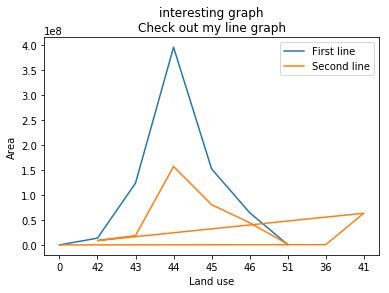

In [30]:
#Plot a line graph
x1 = df_groupby08['secon_08']
x2 = df_groupby16['secon_16']
y1 = df_groupby08 ['AREA_08_M2']
y2 = df_groupby16 ['AREA_16_M2']
plt.plot(x1, y1, label = 'First line')
plt.plot(x2, y2, label = 'Second line')
plt.xlabel('Land use')
plt.ylabel('Area')
plt.legend()
plt.title("interesting graph\nCheck out my line graph")

Text(0.5,1,'interesting graph\nCheck out my line graph')

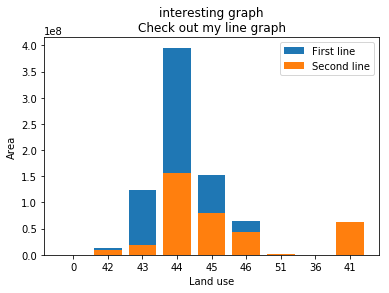

In [31]:
#Plot a bar graph
plt.title("interesting graph\nCheck it out")
x1 = df_groupby08['secon_08']
x2 = df_groupby16['secon_16']
y1 = df_groupby08 ['AREA_08_M2']
y2 = df_groupby16 ['AREA_16_M2']
plt.bar(x1, y1, label = 'First line')
plt.bar(x2, y2, label = 'Second line')
plt.xlabel('Land use')
plt.ylabel('Area')
plt.legend()
plt.title("interesting graph\nCheck out my line graph")


TypeError: can't multiply sequence by non-int of type 'float'

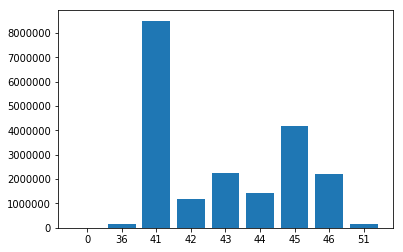

In [32]:
#Plot the first value
x2 = df['secon_16']
y2 = df ['AREA_16_M2']
plt.bar(x2, y2)
plt.xlim(x2.min()*1.1, X.max()*1.1)
plt.ylim(y2.min()*1.1, C.max()*1.1)
plt.xlabel('Land use')
plt.ylabel('Area')

In [ ]:
import matplotlib.pyplot as plt
ax = df[['AREA_08_M2','AREA_16_M2']].plot(kind='bar', title ="V comp")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.ylim(C.min()*1.1, C.max()*1.1)

ax.set_xlabel("Area", fontsize=12)
ax.set_ylabel("Land Use", fontsize=12)
plt.show()

In [ ]:
plt.plot([1,2,3,], [5,6,7,])